<a href="https://colab.research.google.com/github/AkinyemiGbenga/CODSOFT/blob/main/Car_Sales_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# load the dataset using Pandas
CarSales_data = pd.read_csv('car_purchasing.csv', encoding='latin-1')  # or encoding='ISO-8859-1

In [3]:
CarSales_data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
# check number of rows and columns
CarSales_data.shape

(500, 9)

The dataset has 500 rows and 9 columns

In [5]:
# getting information about the dataset
CarSales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
# check for missing values
CarSales_data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

There are no missing value in the dataset

In [7]:
# display summary statistics for each numerical column
CarSales_data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Data Visualisations

In [8]:
# Viewing only the columns in the dataset
CarSales_data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [9]:
# Viewing the dataset
CarSales_data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [10]:
# Count the occurrences of each gender
gender_counts = CarSales_data['gender'].value_counts()
gender_counts

1    253
0    247
Name: gender, dtype: int64

Text(0.5, 1.0, 'Gender Proportion of Customers')

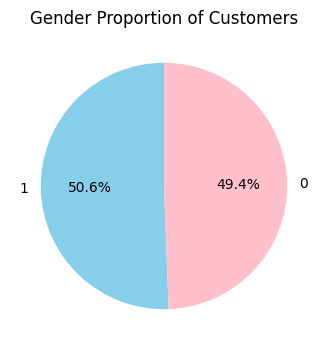

In [14]:
# Calculate the gender proportion
gender_counts = CarSales_data['gender'].value_counts()
labels = gender_counts.index
sizes = gender_counts.values

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'pink'], startangle=90)

# Adding a title
plt.title('Gender Proportion of Customers')

The plot above is a pie plot showing Gender Proportion of Customers with 1 representing Male and 0 representing Female. Males are 50.6% and Females are 49.4% of the polpulation of customers.

Text(0, 0.5, 'Number of Customers')

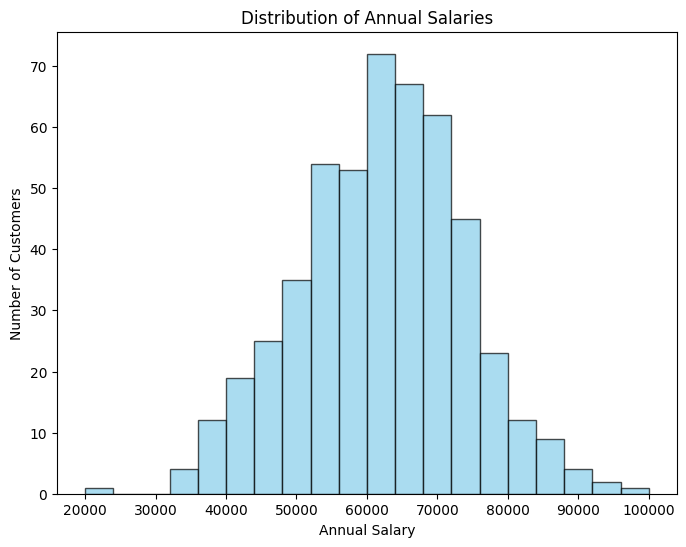

In [12]:
# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(CarSales_data['annual Salary'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Adding labels and title
plt.title('Distribution of Annual Salaries')
plt.xlabel('Annual Salary')
plt.ylabel('Number of Customers')

The histogram above shows the Distribution of the Annual Salaries and the number of customers

Text(0, 0.5, 'Car Purchase Amount')

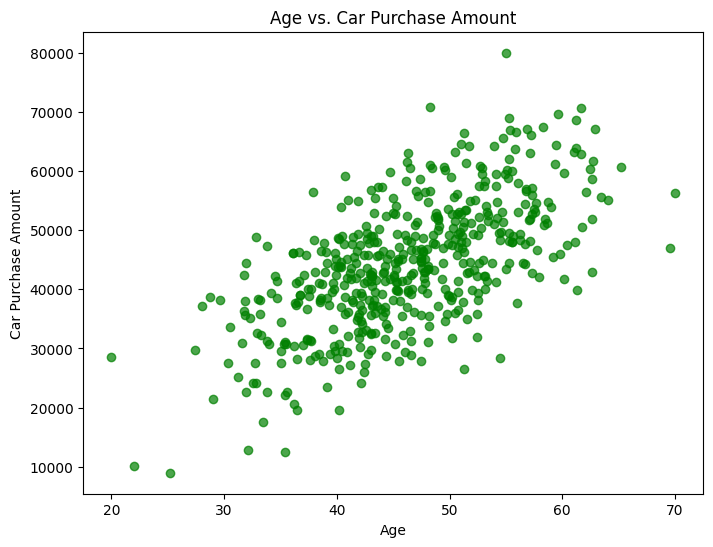

In [13]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(CarSales_data['age'], CarSales_data['car purchase amount'], color='green', alpha=0.7)

# Adding labels and title
plt.title('Age vs. Car Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')

The scatter plot above shows relationship between customer Age and Car Purchase Amount

<ipython-input-15-b8d7a58eec52>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = CarSales_data.corr()


Text(0.5, 1.0, 'Correlation Heatmap of Numerical Variables')

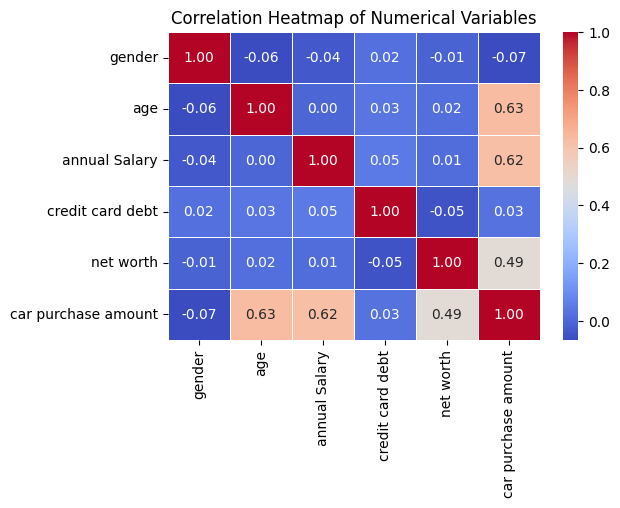

In [15]:
# Calculate the correlation matrix
correlation_matrix = CarSales_data.corr()

# Plotting the correlation heatmap using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Adding a title
plt.title('Correlation Heatmap of Numerical Variables')

The plot above shows the Correlation Heatmap of Numerical Variables. The is a high positive correlation of 0.62 between Annual Salary and Car Purcase Amount

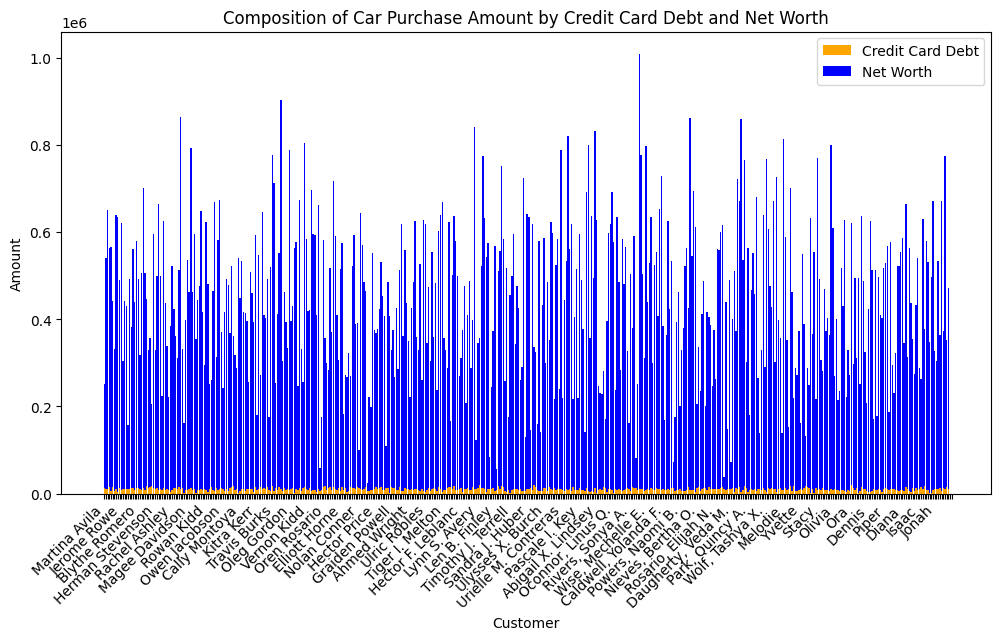

In [24]:
# Making a plot showing Composition of Car Purchase Amount by Credit Card Debt and Net Worth

# Group every 10th label(Label being the customer name)
grouped_labels = [label if i % 10 == 0 else '' for i, label in enumerate(CarSales_data['customer name'])]

# Plotting the stacked bar chart with grouped x-axis labels
plt.figure(figsize=(12, 6))
bars = plt.bar(CarSales_data['customer name'], CarSales_data['credit card debt'], label='Credit Card Debt', color='orange')
plt.bar(CarSales_data['customer name'], CarSales_data['net worth'], bottom=CarSales_data['credit card debt'], label='Net Worth', color='blue')

# Use the grouped labels
plt.xticks(range(len(CarSales_data['customer name'])), grouped_labels, rotation=45, ha='right')

# Adding labels and title
plt.xlabel('Customer')
plt.ylabel('Amount')
plt.title('Composition of Car Purchase Amount by Credit Card Debt and Net Worth')
plt.legend()

# Show the plot
plt.show()


The plot above shows the Composition of Car Purchase Amount by Credit Card Debt and Net Worth. Showing only every 10th customer. (Grouped in 10's)

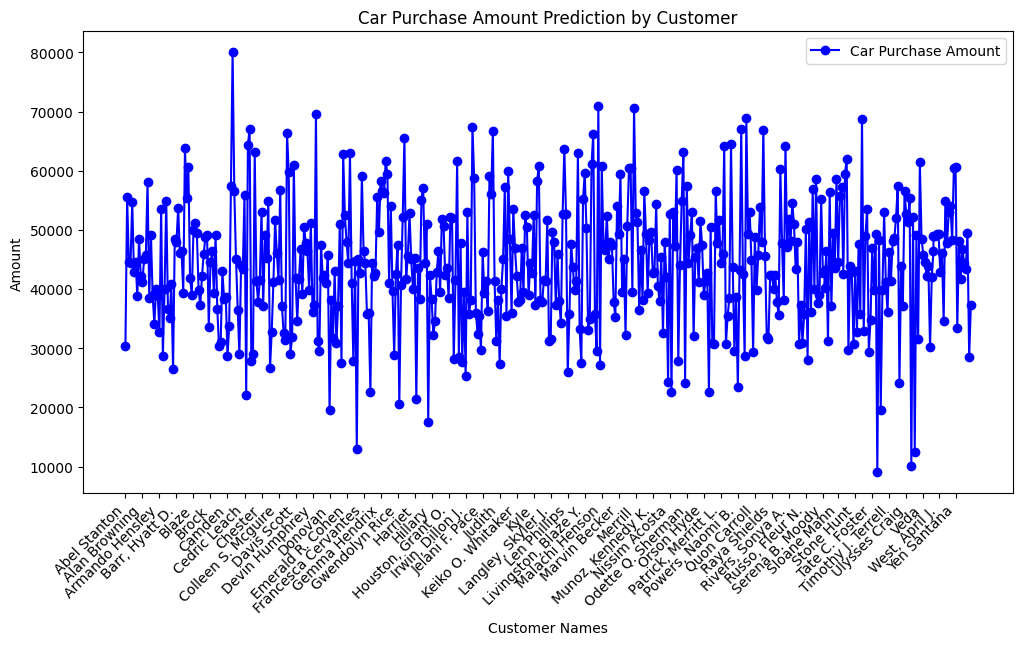

In [49]:
# Making a plot showing Car Purchase Amount Prediction by Customer

# Sort the data based on a hypothetical sequence
CarSales_data.sort_values(by='customer name', inplace=True)

# Plotting the line chart
plt.figure(figsize=(12, 6))

# Plotting the line for 'car purchase amount'
plt.plot(CarSales_data['customer name'], CarSales_data['car purchase amount'], marker='o', label='Car Purchase Amount', color='blue')

# Customize the plot
plt.xlabel('Customer Names')
plt.ylabel('Amount')
plt.title('Car Purchase Amount Prediction by Customer')

# Set x-axis ticks to show every 10th label
plt.xticks(CarSales_data['customer name'][::10], rotation=45, ha='right')

plt.legend()
plt.show()


The plot above shows the Car Purchase Amount Prediction by Customer. Showing only every 10th customer. (Grouped in 10's)

In [19]:
CarSales_data.columns


Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [36]:
# Separate target variable y (dependent variable) and independent variables X
X = CarSales_data.drop(['car purchase amount', 'customer e-mail', 'customer name'],  axis=1)  # Independent variables
y = CarSales_data['car purchase amount']  # Target variable


In [37]:
# Display the separated variables
print("Independent Variables (X):")
print(X)


Independent Variables (X):
         country  gender        age  annual Salary  credit card debt  \
82       Ecuador       1  39.717155    48567.07462       9724.031647   
290      Croatia       0  63.414531    46549.16329        640.045378   
204       Poland       0  53.762732    65834.56889      15353.257740   
77        Guinea       1  56.519529    53450.90036       8740.723093   
124        Benin       0  54.199455    60991.82443       7329.228510   
..           ...     ...        ...            ...               ...   
239      Bahrain       1  45.138518    62939.12851        632.052852   
21        Angola       0  48.081120    64347.34531      10905.366280   
237      Bermuda       0  50.717326    60404.38394       4198.839128   
295  Puerto Rico       1  39.983496    57455.76090      12186.027930   
472       Malawi       1  39.281245    65019.15701       4931.560160   

       net worth  
82   407401.3776  
290  626163.8320  
204  152012.3530  
77   309113.0627  
124  586368.9

In [38]:
print("\nTarget Variable (y):")
print(y)


Target Variable (y):
82     30394.82494
290    55543.38497
204    44525.02085
77     44434.71917
124    54755.42038
          ...     
239    44434.98419
21     43402.31525
237    49399.97041
295    28440.81268
472    37364.23474
Name: car purchase amount, Length: 500, dtype: float64


Splitting the data into train data and test data

In [39]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Identify categorical columns
categorical_cols = ['country']

# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

In [43]:
# Apply one-hot encoding to categorical columns
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [44]:
# Choose and train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [46]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6319807.013177037


In [48]:
# To get the MSE of the target variable
y_true = CarSales_data['car purchase amount']

# Calculate the mean of the target variable
mean_prediction = y_true.mean()

# Create an array of the mean value with the same length as the target variable
y_mean_predicted = [mean_prediction] * len(y_true)

# Evaluate the performance of the mean prediction using mean squared error
mse_mean_prediction = mean_squared_error(y_true, y_mean_predicted)

print(f'Mean Squared Error for Mean Prediction: {mse_mean_prediction}')


Mean Squared Error for Mean Prediction: 115829257.49473368


Mean Square Error of the model= 6319807.013177037

Mean Square Error for the mean prediction = 115829257.49473368


The MSE for the machine learning model is significantly lower than the MSE for the mean prediction baseline. This is generally a positive outcome, as it suggests that the model is providing predictions that are, on average, much closer to the actual values than simply predicting the mean.